<a href="https://colab.research.google.com/github/SriChaCodes/EEG_Brainwaves/blob/main/EEGBrainwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guntucharitasri","key":"006ee960d3bf8bbca5a5b68d7ab6d876"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install --upgrade kaggle


In [ ]:
!pip install pandas matplotlib seaborn tensorflow scikit-learn


In [ ]:
!pip install pandas-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cc25370d169669cfca5e8471729f35cb5ea070c02148a4203705f649f87c7fdc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip install pydantic-settings

In [ ]:
!pip install --upgrade pandas-profiling

In [ ]:
!pip uninstall pandas-profiling -y

Found existing installation: pandas-profiling 3.6.6
Uninstalling pandas-profiling-3.6.6:
  Successfully uninstalled pandas-profiling-3.6.6


In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install scikeras

In [ ]:
import warnings
import itertools
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp # Changed import to ydata_profiling

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scikeras.wrappers import KerasClassifier # Import from scikeras
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Assuming the file 'emotions.csv' is in the root of your content directory
df = pd.read_csv('/content/emotions.csv')
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()


# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00      0  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57      1  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00      2  
3      299.0      132.0     -12.40       9.53       9.53     -12.40      2  
4       12.0      119.0     -17.60      23.90      23.90     -17.60      1  

[5 rows x 2549 columns]

In [ ]:
# Checking for missing values
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

Classes are almost balanced. We can get away with the difference.
label
1    716
0    708
2    708
Name: count, dtype: int64


<Axes: title={'center': 'Label'}, xlabel='label'>

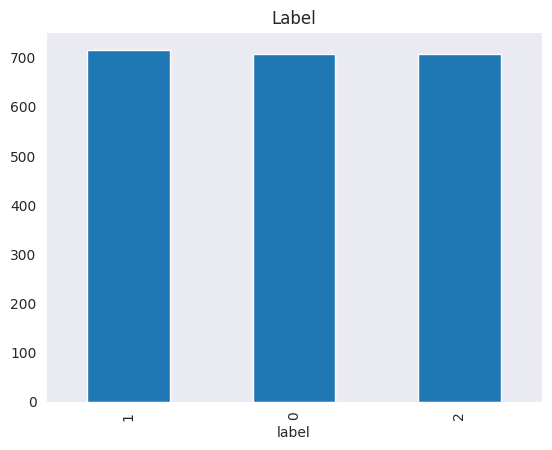

In [ ]:
print(f'Classes are almost balanced. We can get away with the difference.\n{df.label.value_counts()}')
df.label.value_counts().plot(kind='bar', color='tab:blue', title='Label')

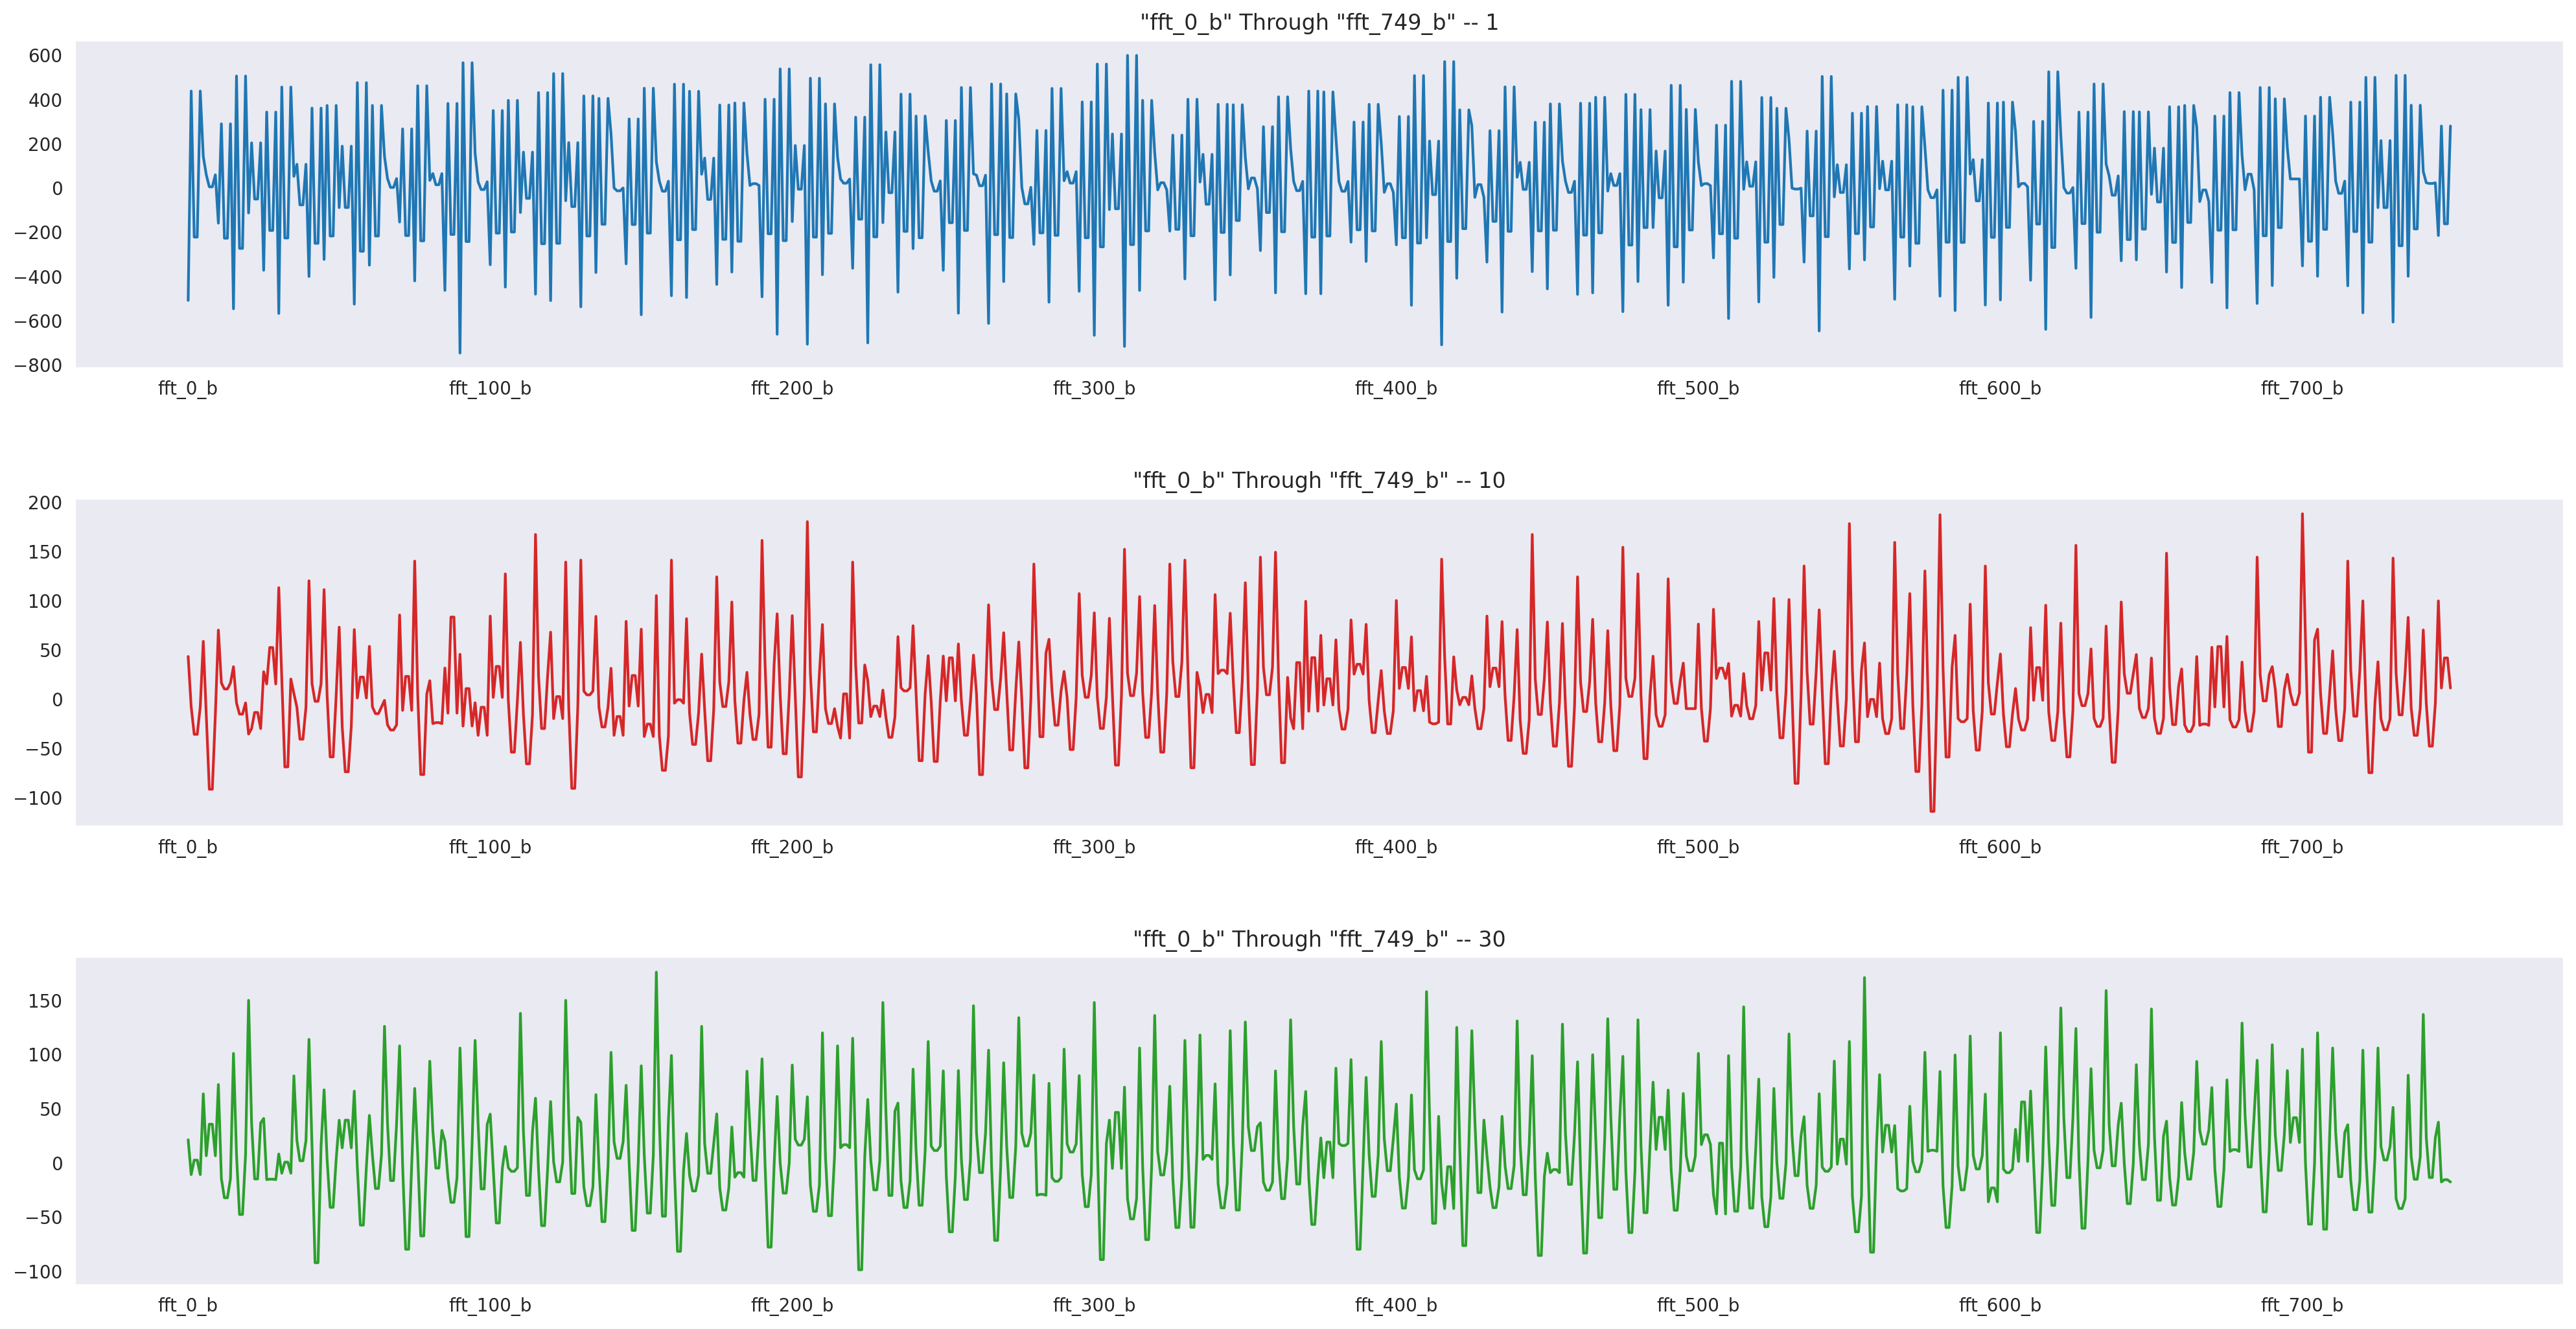

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

df.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
df.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
df.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1,
                    right=0.9, top=0.9,
                    wspace=0.4, hspace=0.4)

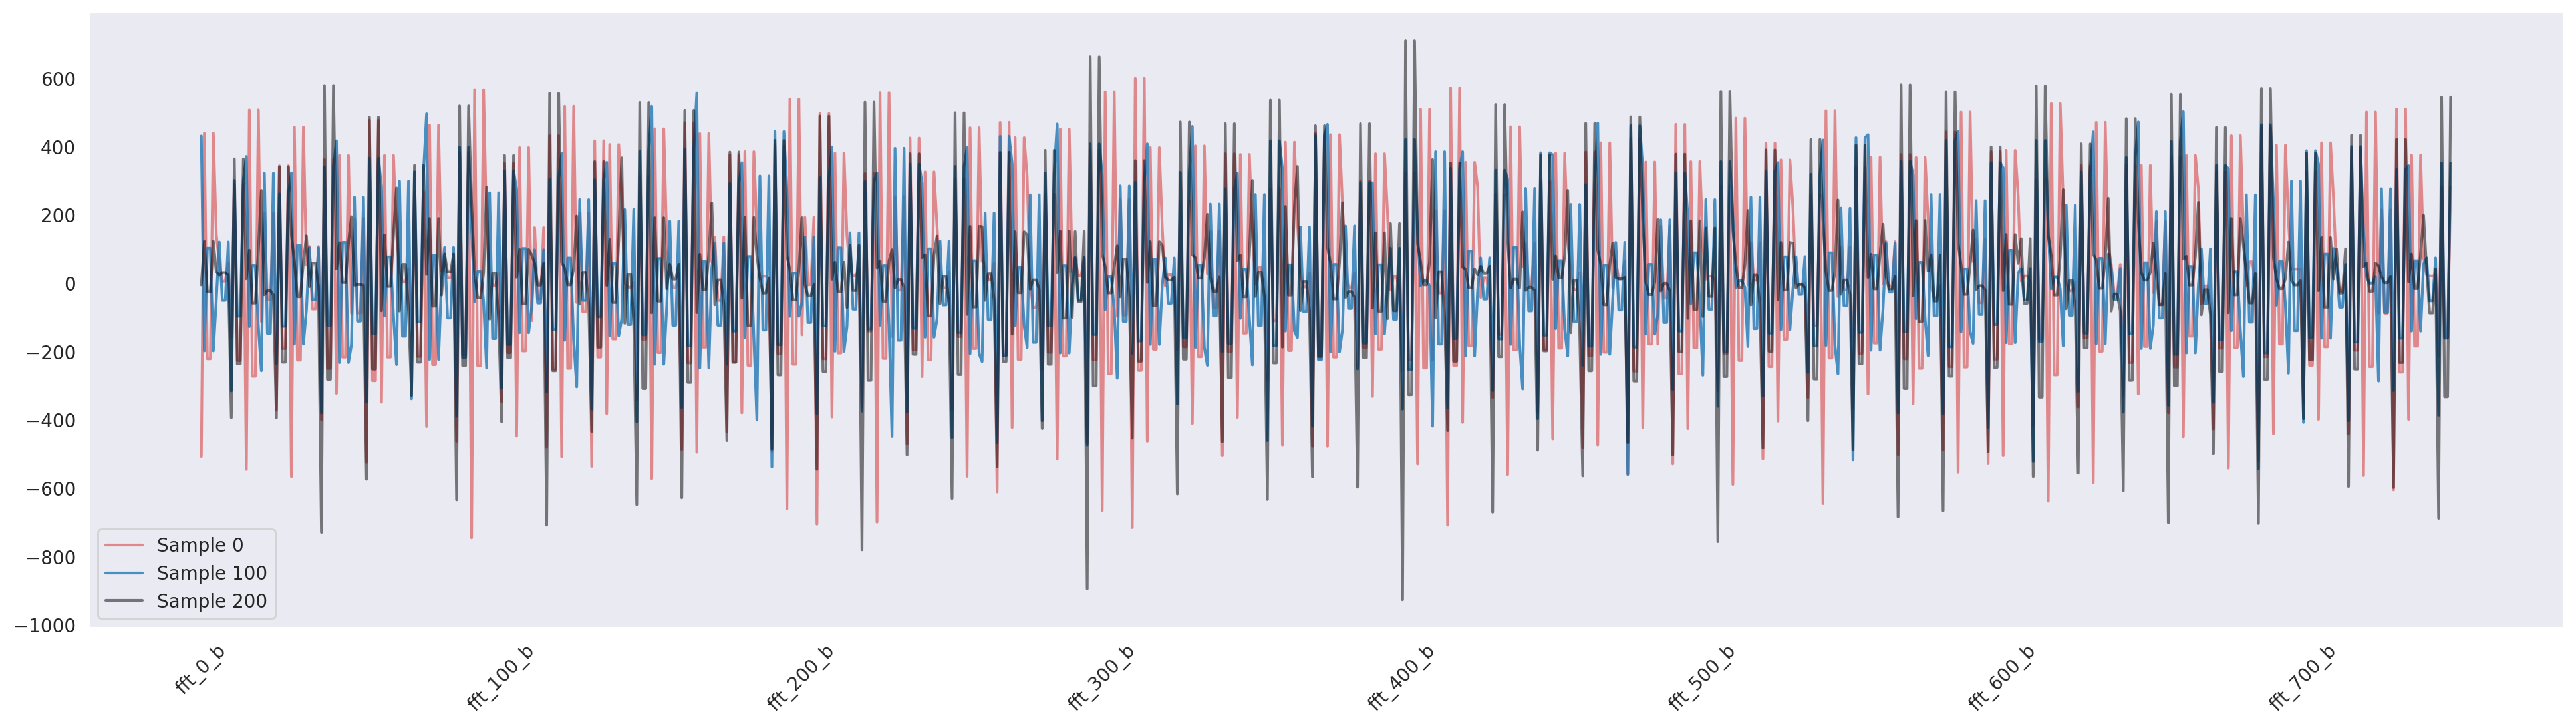

In [ ]:
plt.figure(dpi=200, figsize=(24, 6))


plt.plot(df.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(df.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(df.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)


plt.xticks(np.arange(0, len(df.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')

plt.show()

3.1 LSTM


In [ ]:
!pip install pyod==2.0.2

In [ ]:
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [ ]:
channels = 32
seconds = 0.5    # Size of each segment we want
fs = 256.0         # Dtaset eeg sampling rate
data_portion = 1
save_model = False

In [ ]:
import pandas as pd

# Assuming the file 'emotions.csv' is in the root of your content directory
df = pd.read_csv('/content/emotions.csv')
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE  
3      299.0      132.0     -12.40       9.53       9.53     -12.40  POSITIVE  
4       12.0      119.0     -17.60      23.90      23.90     -17.60   NEUTRAL  

[5 rows x 2549 columns]

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf

from tensorflow.keras import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Embedding, Input, BatchNormalization
from tensorflow.keras.layers import LSTM,GRU

from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint

In [ ]:
import pandas as pd

# Assuming the file 'emotions.csv' is in the root of your content directory
df = pd.read_csv('/content/emotions.csv')
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00      0  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57      1  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00      2  
3      299.0      132.0     -12.40       9.53       9.53     -12.40      2  
4       12.0      119.0     -17.60      23.90      23.90     -17.60      1  

[5 rows x 2549 columns]

In [ ]:
df.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [ ]:
emotion_data = df

In [ ]:
emotion_data.head(5)

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00      0  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57      1  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00      2  
3      299.0      132.0     -12.40       9.53       9.53     -12.40      2  
4       12.0      119.0     -17.60      23.90      23.90     -17.60      1  

[5 rows x 2549 columns]

In [ ]:
emotion_data.tail()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
2127      32.400      32.2      32.2     30.80      23.4        1.64   
2128      16.300      31.3    -284.0     14.30      23.9        4.20   
2129      -0.547      28.3    -259.0     15.80      26.7        9.08   
2130      16.800      19.9    -288.0      8.34      26.0        2.46   
2131      27.000      32.0      31.8     25.00      28.9        4.99   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
2127       -2.03       0.647      -0.121       -1.10  ...     -21.70   
2128        1.09       4.460       4.720        6.63  ...     594.00   
2129        6.90      12.700       2.030        4.64  ...     370.00   
2130        1.58     -16.000       1.690        4.74  ...     124.00   
2131        1.95       6.210       3.490       -3.51  ...       1.95   

      fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
2127      0.218      0.218     -21.70       95.2     -19.90       47.2   
2128   -324.000   -324.000     594.00      -35.5     142.00      -59.8   
2129   -160.000   -160.000     370.00      408.0    -169.00      -10.5   
2130    -27.600    -27.600     124.00     -656.0     552.00     -271.0   
2131      1.810      1.810       1.95      110.0      -6.71       22.8   

      fft_748_b  fft_749_b  label  
2127       47.2     -19.90      1  
2128      -59.8     142.00      2  
2129      -10.5    -169.00      0  
2130     -271.0     552.00      0  
2131       22.8      -6.71      1  

[5 rows x 2549 columns]

In [ ]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), int64(1)
memory usage: 41.5 MB


In [ ]:
emotion_data.describe()

# mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  ...  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  ...   
mean      0.025378     0.052282     0.301655     0.036793     0.083567  ...   
std      17.981796     8.509174    68.098894    17.010031    18.935378  ...   
min    -218.000000  -255.000000 -1360.000000  -203.000000  -553.000000  ...   
25%      -3.105000    -1.340000    -4.002500    -2.905000    -2.622500  ...   
50%      -0.044600     0.132000     0.957500    -0.099750     0.146500  ...   
75%       2.920000     1.540000     6.735000     2.535000     2.870000  ...   
max     402.000000   257.000000  1150.000000   349.000000   444.000000  ...   

         fft_741_b    fft_742_b    fft_743_b    fft_744_b    fft_745_b  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean    104.946111   -51.973647   -51.973647   104.946111    -6.934144   
std     212.532721   112.160233   112.160233   212.532721   281.040552   
min    -921.000000  -504.000000  -504.000000  -921.000000 -1160.000000   
25%      -8.365000   -92.900000   -92.900000    -8.365000  -102.500000   
50%      12.150000   -21.800000   -21.800000    12.150000    89.700000   
75%     177.000000    12.025000    12.025000   177.000000   153.000000   
max     843.000000  1490.000000  1490.000000   843.000000  1180.000000   

         fft_746_b    fft_747_b    fft_748_b    fft_749_b        label  
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  
mean     95.104886   -49.061255   -49.061255    95.104886     1.000000  
std     203.194976   106.486317   106.486317   203.194976     0.815154  
min   -1010.000000  -521.000000  -521.000000 -1010.000000     0.000000  
25%      -8.837500   -87.150000   -87.150000    -8.837500     0.000000  
50%      13.400000   -24.100000   -24.100000    13.400000     1.000000  
75%     149.250000    10.925000    10.925000   149.250000     2.000000  
max     888.000000  1670.000000  1670.000000   888.000000     2.000000  

[8 rows x 2549 columns]

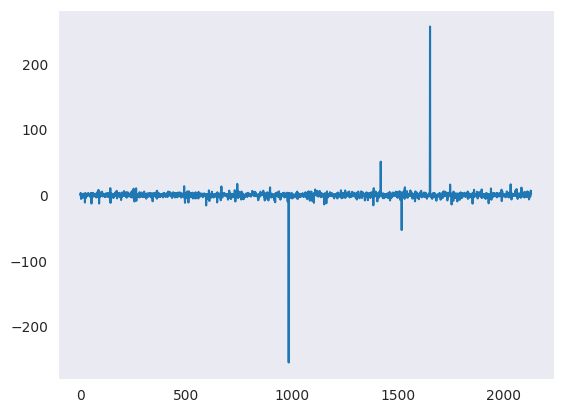

In [ ]:
plt.plot(emotion_data['mean_d_1_a'])

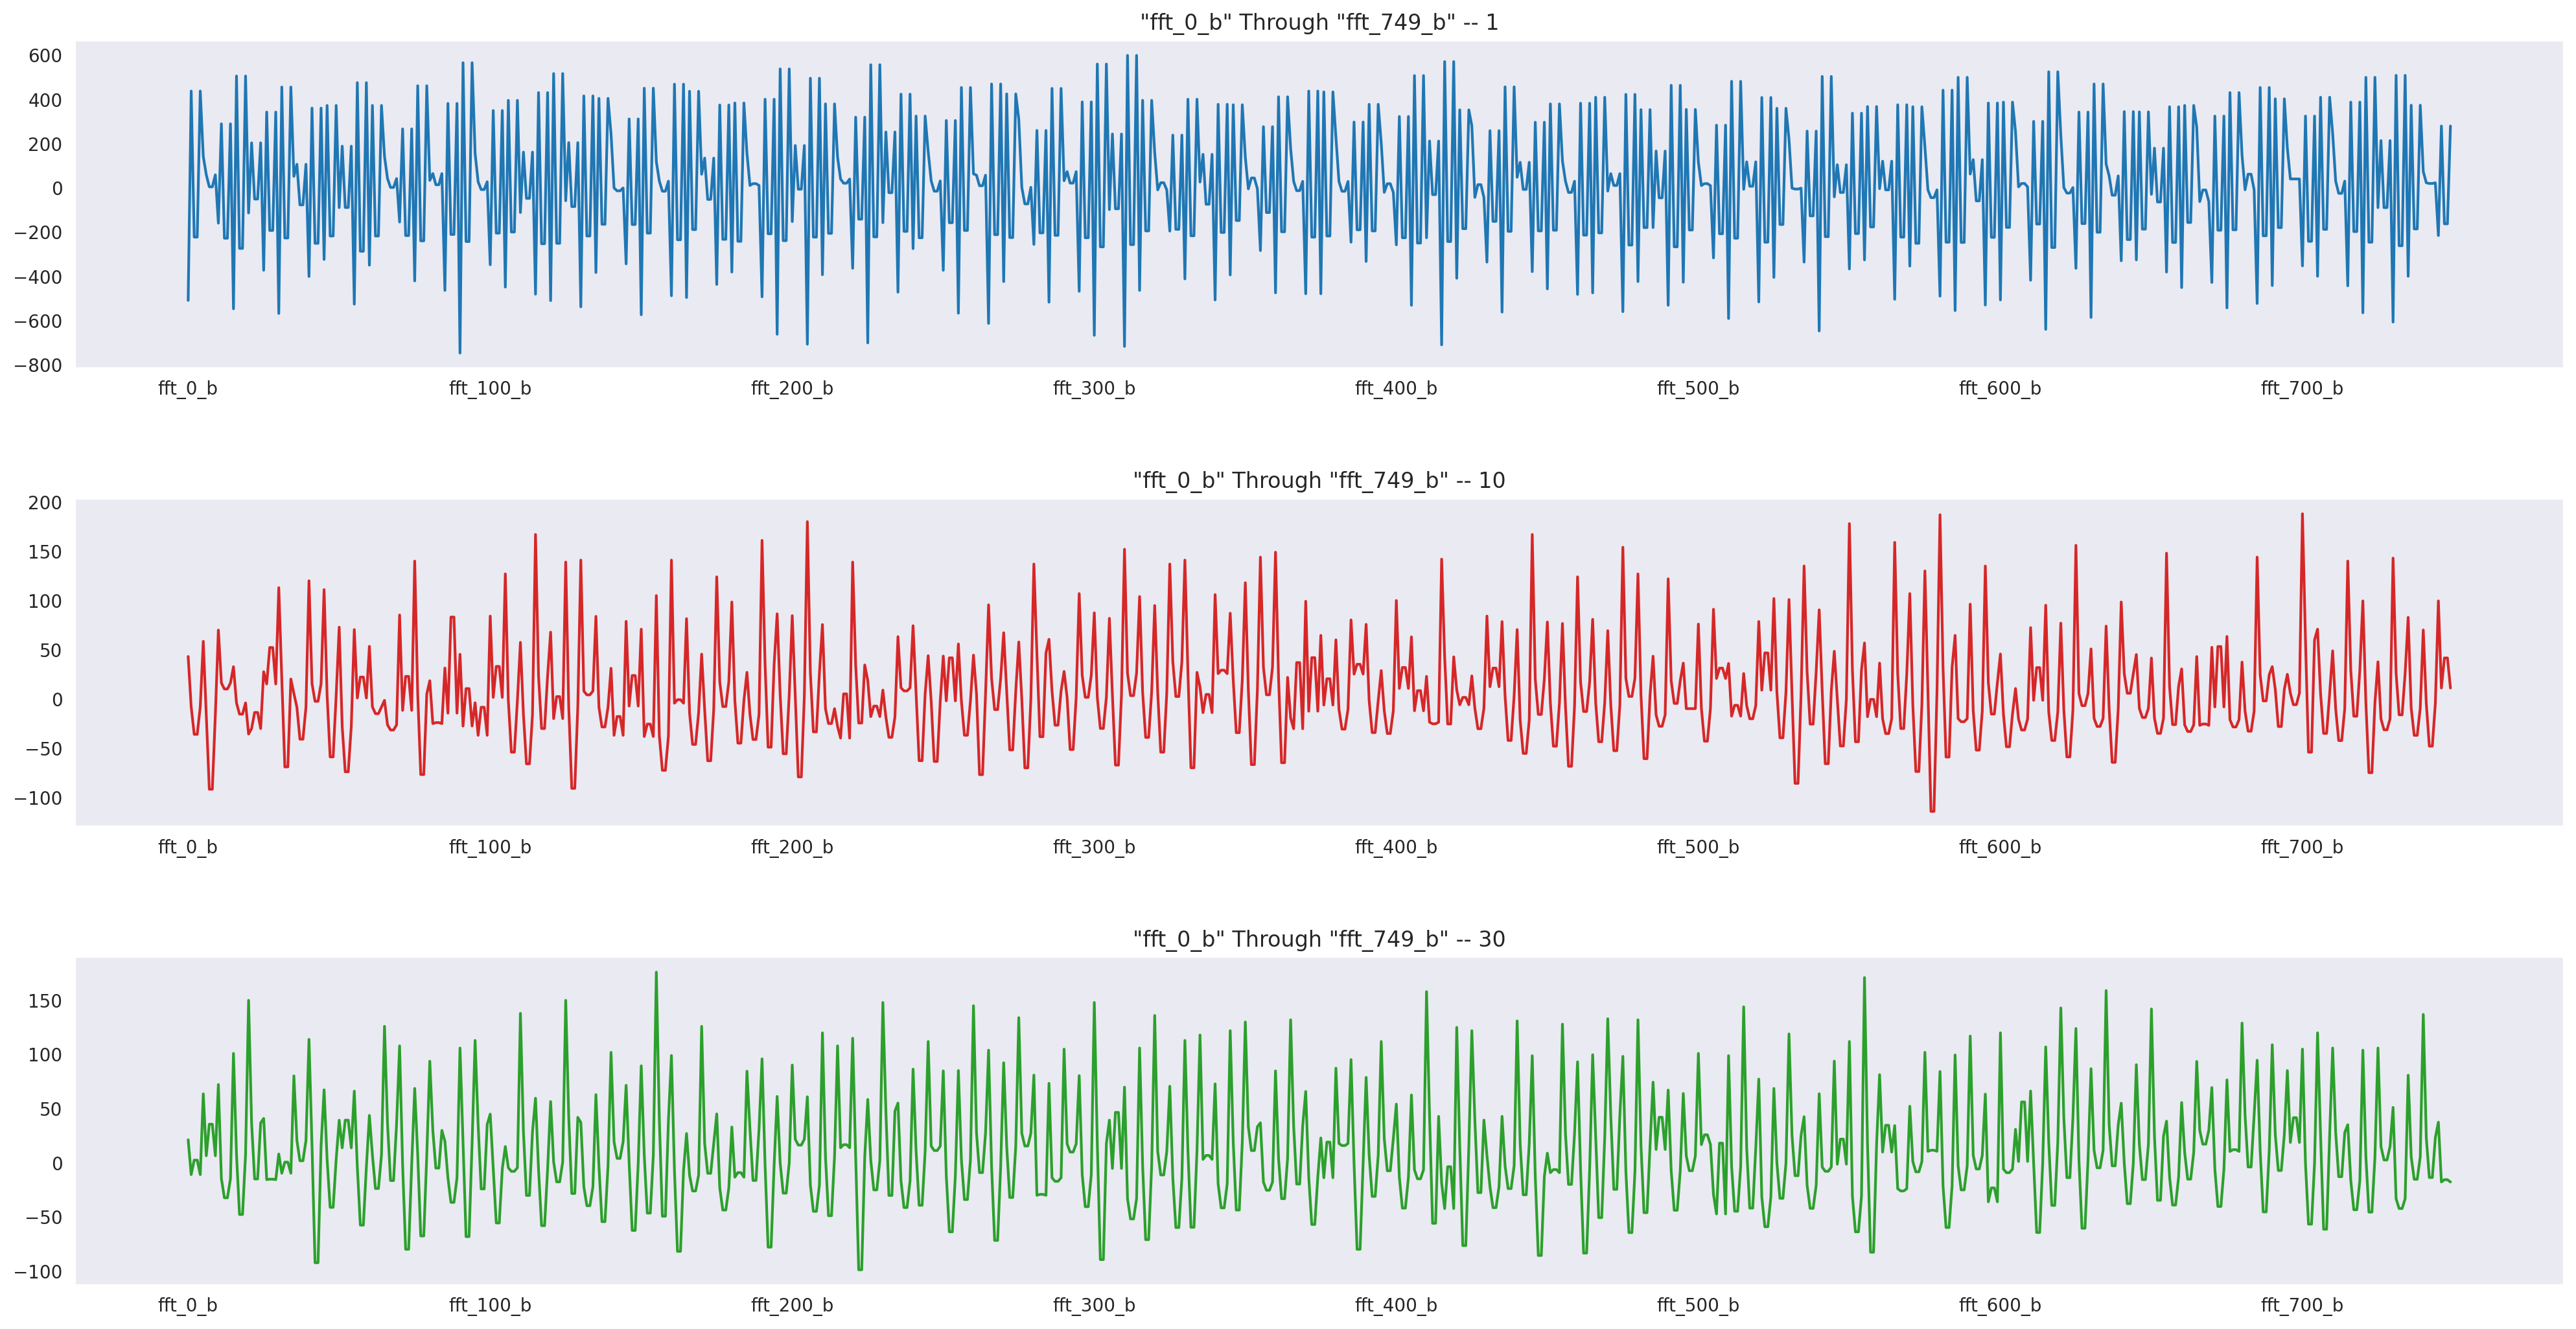

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

emotion_data.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
emotion_data.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
emotion_data.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1,
                    right=0.9, top=0.9,
                    wspace=0.4, hspace=0.4)

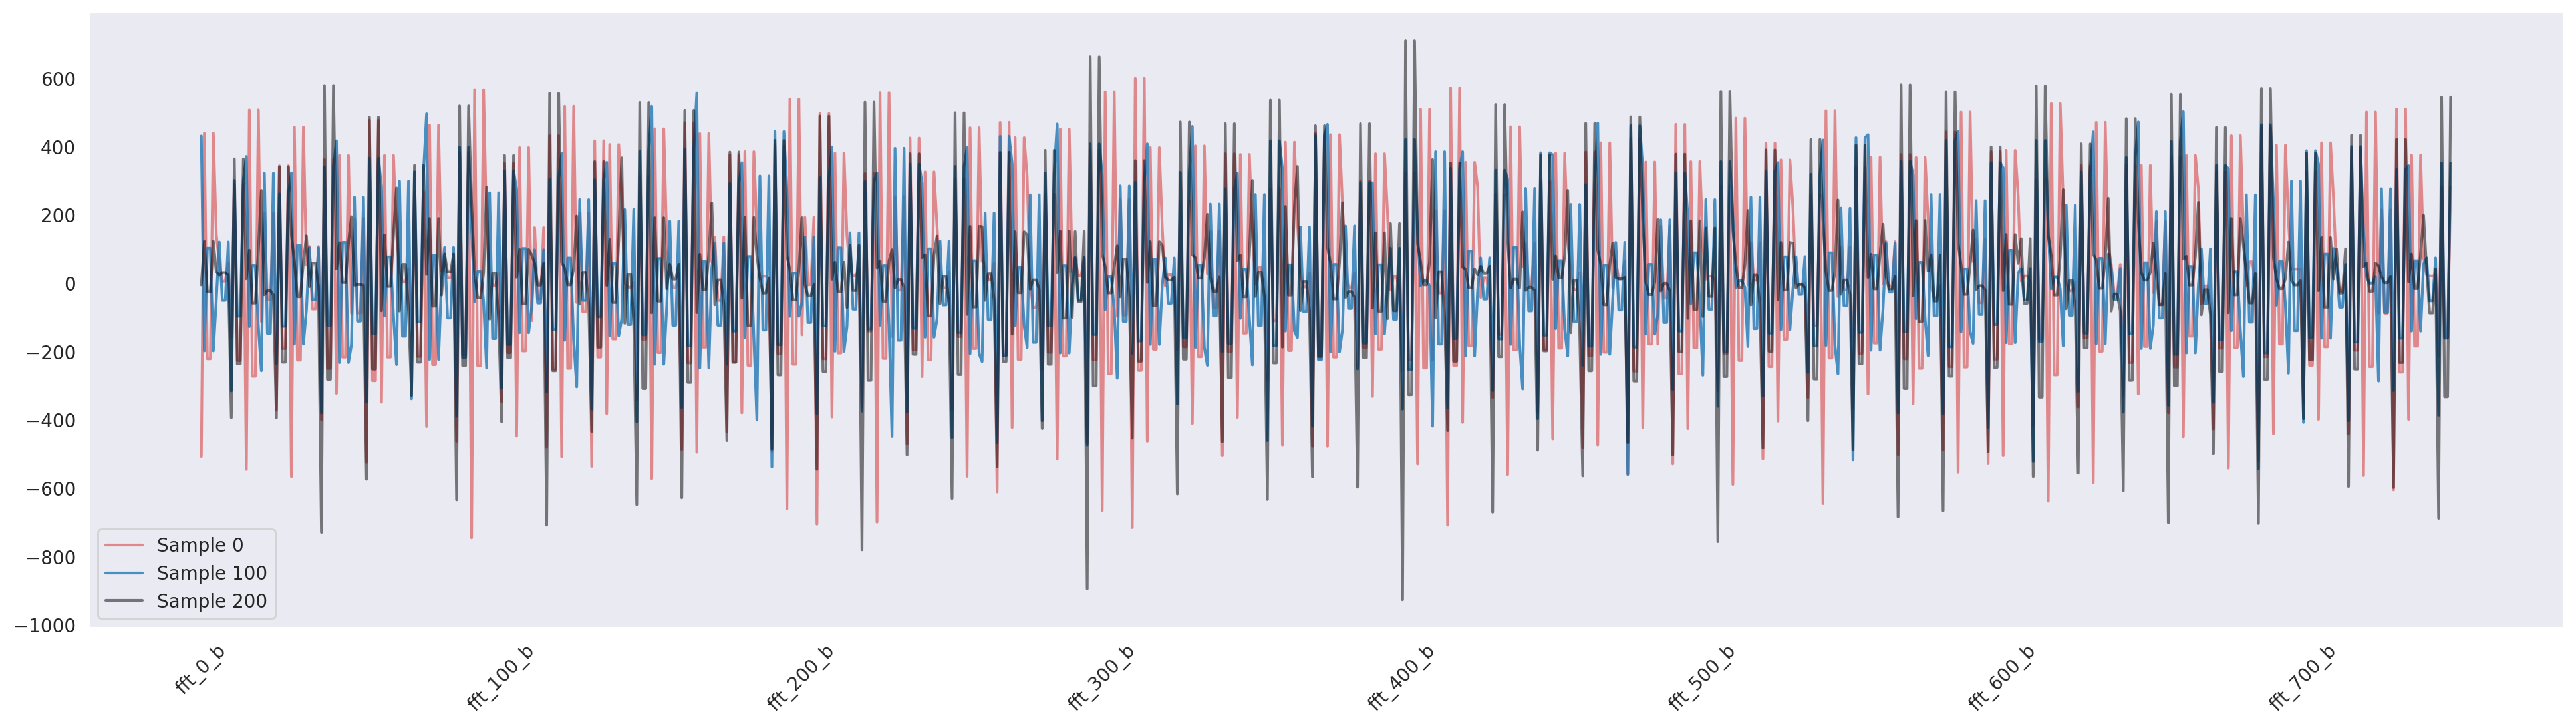

In [ ]:
plt.figure(dpi=200, figsize=(24, 6))

plt.plot(emotion_data.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(emotion_data.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(emotion_data.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)

plt.xticks(np.arange(0, len(emotion_data.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')

plt.show()

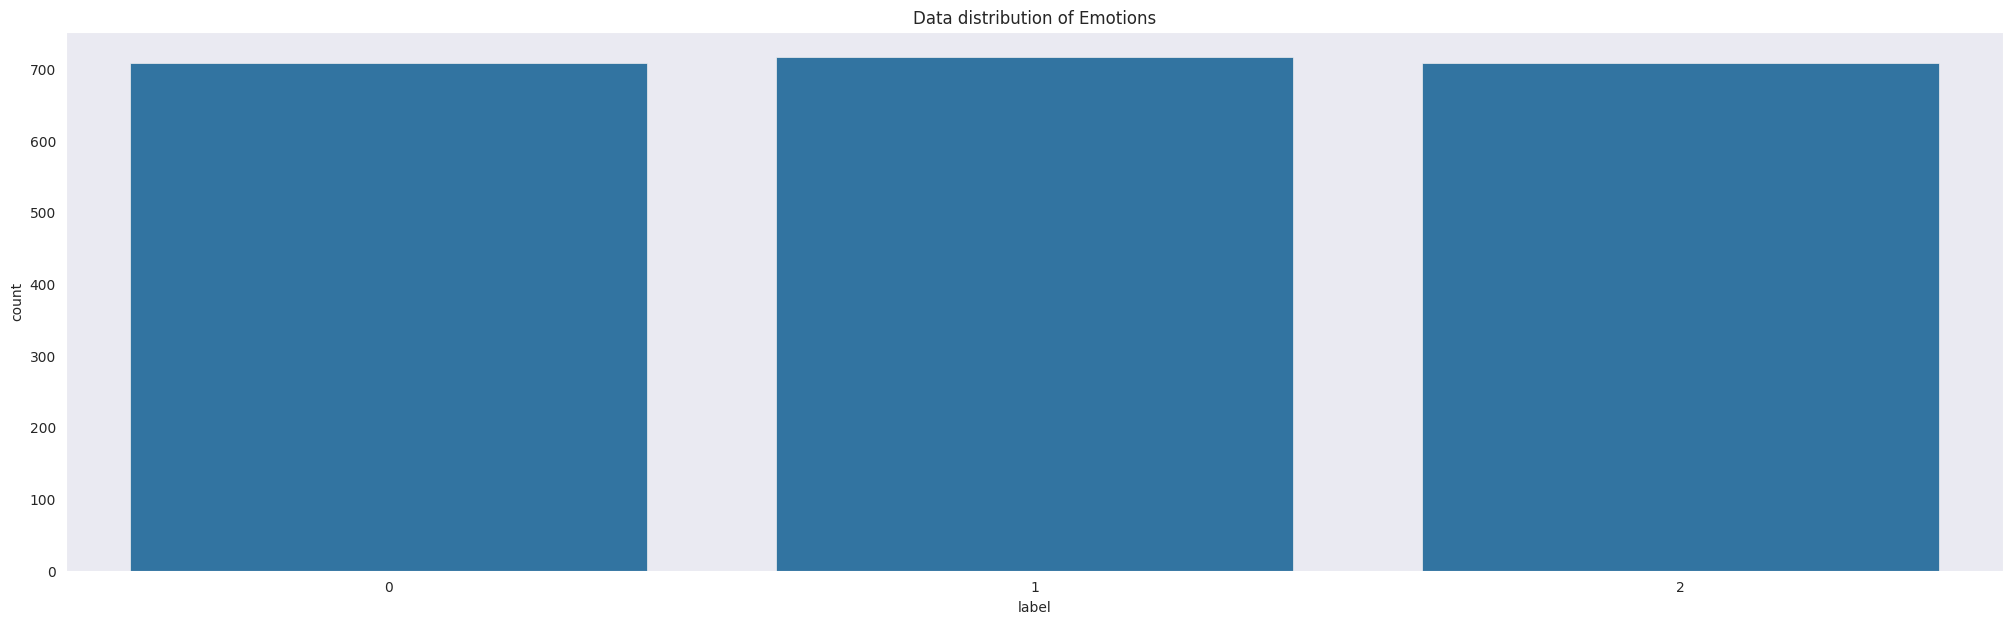

In [ ]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=emotion_data)
plt.show()

Preprocessing


In [ ]:
emotion_data['label'].value_counts()

label
1    716
0    708
2    708
Name: count, dtype: int64

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [ ]:
def preprocess_inputs(df: pd.DataFrame, label_mapping: dict, train_size: float=0.8, scale_data: bool=False,
                      verbose:int = 1) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    df = df.copy()

    if label_mapping:
        # df['label'] = df['label'].replace(label_mapping)

        le = LabelEncoder()
        df['label'] = le.fit_transform(df['label'])
        print(le.classes_)  # ['NEGATIVE' 'NEUTRAL' 'POSITIVE']


    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()

    if scale_data:
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    if verbose == 1:
        print("X_train shape:", X_train.shape)
        print("X_test shape:", X_test.shape)
        print("y_train shape:", y_train.shape)
        print("y_test shape:", y_test.shape)
    else:
        pass

    return X_train, X_test, y_train, y_test





In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(emotion_data, label_mapping, train_size = 0.8,
                                                     scale_data = True, verbose=1)

[0 1 2]
X_train shape: (1705, 2548)
X_test shape: (427, 2548)
y_train shape: (1705,)
y_test shape: (427,)


In [ ]:
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))

print("X_train shape:", X_train_reshaped.shape)
print("X_test shape:", X_test_reshaped.shape)

X_train shape: (1705, 2548, 1)
X_test shape: (427, 2548, 1)


In [ ]:
inputs = tf.keras.Input(shape=(X_train_reshaped.shape[1],1))

gru = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
gru = tf.keras.layers.GRU(128, return_sequences=True)(inputs)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 2548, 128)           │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 326144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │         978,435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,028,739 (3.92 MB)

 Trainable params: 1,028,739 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
inputs = Input(shape=(X_train_reshaped.shape[1], 1))

lstm = LSTM(256, return_sequences=True)(inputs)
lstm = Flatten()(lstm)
y_lstm = Dense(3, activation='softmax')(lstm)

model_lstm = Model(lstm, y_lstm)

model_lstm.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_115CLONE (InputLayer)   │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,956,867 (7.46 MB)

 Trainable params: 1,956,867 (7.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input

def create_model(input_shape):

    inputs = Input(shape=input_shape)

    x = tf.keras.layers.Conv1D(16, 10, activation='relu')(inputs)
    x = tf.keras.layers.Conv1D(16, 3, activation='relu')(x)

    x = tf.keras.layers.MaxPool1D(2)(x)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(100, activation="relu")(x)
    outputs = tf.keras.layers.Dense(3, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model = create_model((X_train_reshaped.shape[1], 1))

print(model.summary())

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 2539, 16)            │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2537, 16)            │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1268, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 20288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │       2,028,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,030,163 (7.74 MB)

 Trainable params: 2,030,163 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout

def create_model(input_shape):

    inputs = Input(shape=input_shape)

    x = tf.keras.layers.Conv1D(32, 10, activation='relu')(inputs)  # Increased filters
    x = Dropout(0.3)(x)  # Added Dropout to reduce overfitting

    x = tf.keras.layers.Conv1D(64, 3, activation='relu')(x)  # Increased filters
    x = Dropout(0.3)(x)  # Added Dropout again after Conv1D

    x = tf.keras.layers.MaxPool1D(2)(x)

    x = tf.keras.layers.Conv1D(128, 3, activation='relu')(x)
    x = Dropout(0.3)(x)  # Dropout layer after additional Conv1D

    x = tf.keras.layers.Flatten()(x)

    # MLP Dense layer (Fully connected layer)
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Added Dense layer to form MLP
    x = Dropout(0.5)(x)  # Dropout after MLP layer

    # Final output layer
    outputs = tf.keras.layers.Dense(3, activation="softmax")(x)

    # Model definition
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    # Model compilation
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Example usage
model = create_model((X_train_reshaped.shape[1], 1))

# Print the model summary
print(model.summary())

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 2539, 32)            │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 2539, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2537, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 2537, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1268, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 1266, 128)           │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 1266, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 162048)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │      20,742,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,773,923 (79.25 MB)

 Trainable params: 20,773,923 (79.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
def create_dnn_model(input_shape):
    # Input katmanı
    inputs = Input(shape=input_shape)

    # İlk Dense katmanı + Batch Normalization ve Dropout
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)  # Batch Normalization
    x = Dropout(0.5)(x)  # Dropout

    # İkinci Dense katmanı + Batch Normalization ve Dropout
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)  # Batch Normalization
    x = Dropout(0.5)(x)  # Dropout

    # Üçüncü Dense katmanı (Çıkış katmanı)
    outputs = Dense(3, activation='softmax')(x)

    # Modeli oluşturuyoruz
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    # Modeli derliyoruz
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Etiketlerin tam sayı olması gerektiği için sparse
        metrics=['accuracy']
    )

    return model

# Modeli oluşturuyoruz
model = create_dnn_model((X_train_reshaped.shape[1],))

# Model özetini yazdırıyoruz
print(model.summary())

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         652,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687,363 (2.62 MB)

 Trainable params: 686,595 (2.62 MB)

 Non-trainable params: 768 (3.00 KB)

None


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            mode='min', verbose=1
        )
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            '/kaggle/working/best_model.keras',
            monitor='val_accuracy', mode='max',
            verbose=1, save_best_only=True)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_reshaped,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        early_stopping,
        model_checkpoint
    ]
)

Epoch 1/100
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9873 - loss: 0.0407
Epoch 1: val_accuracy did not improve from 0.99707
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9870 - loss: 0.0413 - val_accuracy: 0.9883 - val_loss: 0.0404
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9790 - loss: 0.0517
Epoch 2: val_accuracy did not improve from 0.99707
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9790 - loss: 0.0519 - val_accuracy: 0.9883 - val_loss: 0.0317
Epoch 3/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9779 - loss: 0.0640
Epoch 3: val_accuracy did not improve from 0.99707
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9781 - loss: 0.0635 - val_accuracy: 0.9912 - val_loss: 0.0251
Epoch 4/100
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9832 - loss: 0.0457
Epoch 4: val_accuracy did not improve from 0.99707
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9833 - loss: 0.0455 - val_accuracy: 0.9824 - val_loss

In [ ]:
loss, acc = model.evaluate(X_test_reshaped, y_test, verbose=1)
print("Test Accuracy: {:.2f}%".format(acc * 100))
print("Test Loss: {:.3f}%".format(loss))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0446 
Test Accuracy: 98.13%
Test Loss: 0.056%


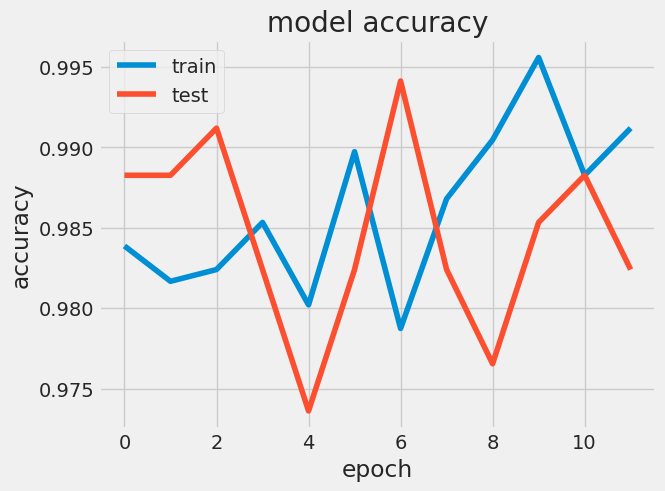

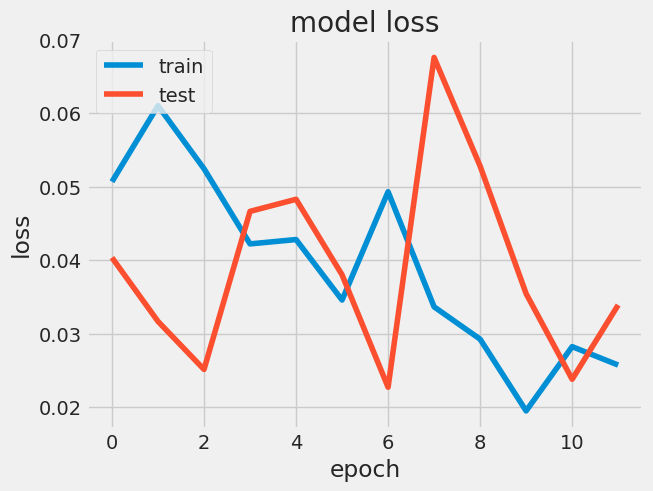

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Sınıf etiketlerine dönüştürme
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n----------------------\n", clr)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.99      0.97      0.98       143
     NEUTRAL       1.00      0.98      0.99       148
    POSITIVE       0.95      0.99      0.97       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



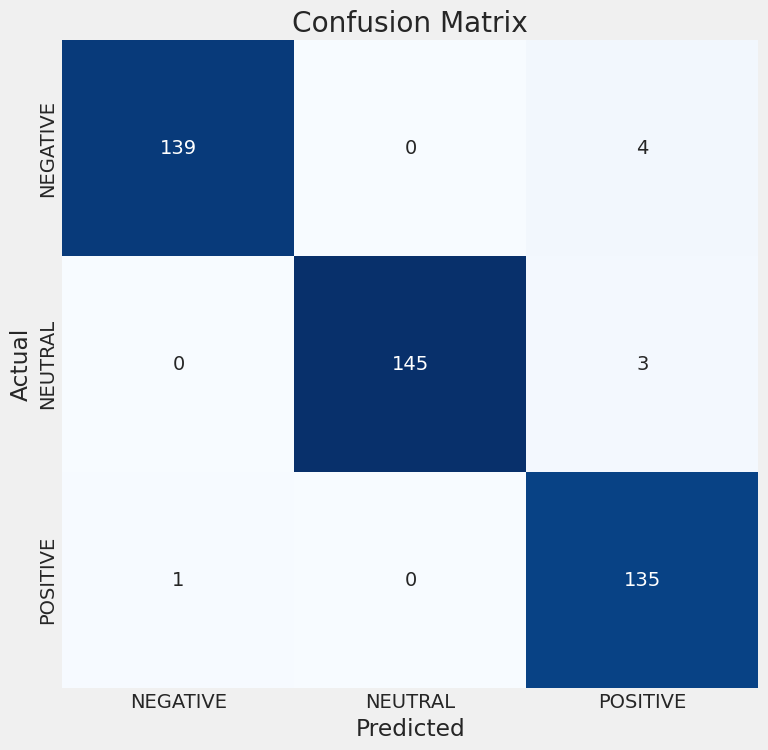

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Gerçek etiketleri ikili formata dönüştür
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Sınıflar 0, 1, 2 olduğu varsayılıyor
n_classes = y_test_bin.shape[1]

In [ ]:
X_test_reshaped = X_test_reshaped.reshape(-1, X_test_reshaped.shape[1])
y_pred_prob = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


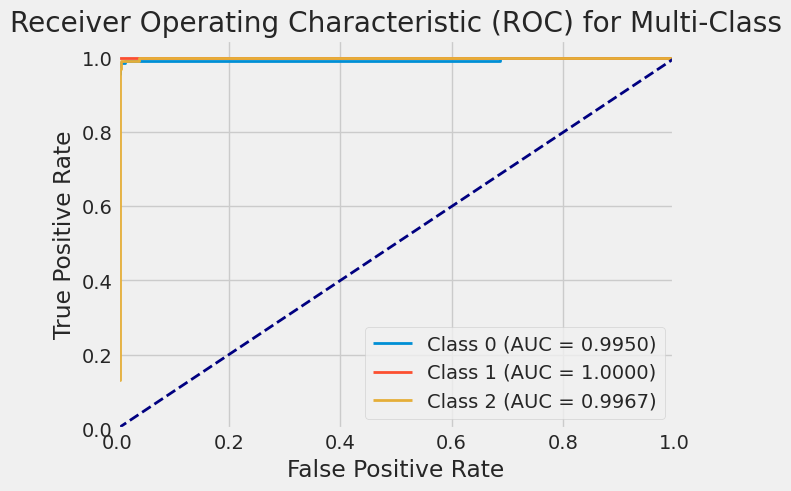

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve'yi çiz
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (AUC = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc='lower right')
plt.show()

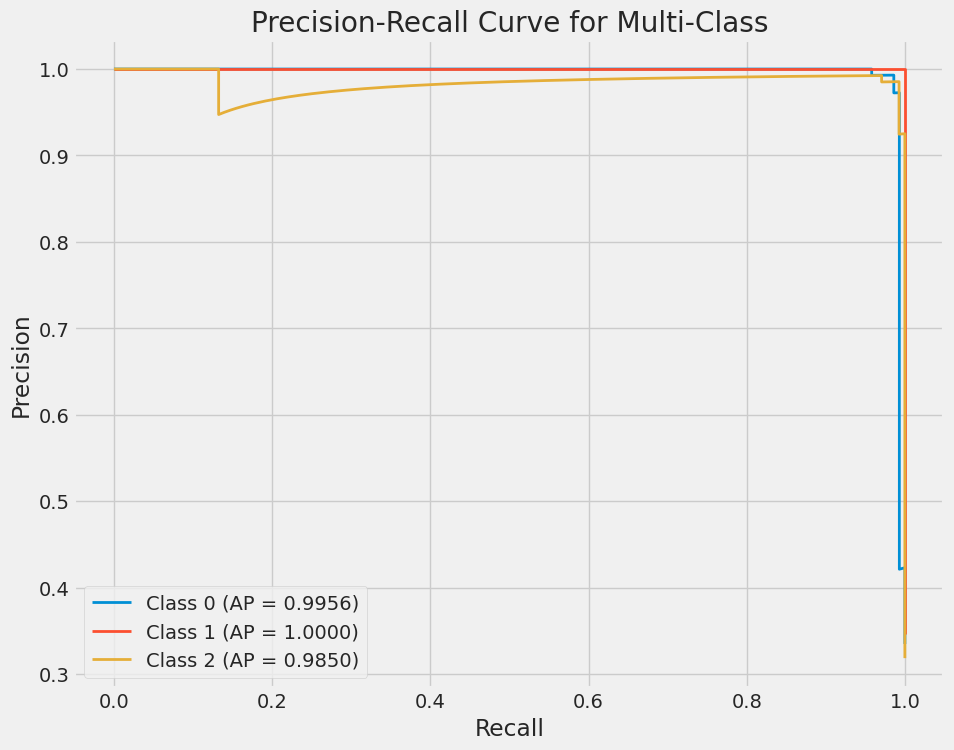

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision, Recall ve Average Precision için boş sözlükler
precision = {}
recall = {}
average_precision = {}

# Her sınıf için Precision-Recall eğrisini hesapla
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Precision-Recall Curve'yi çiz
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:0.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import average_precision_score

average_precision = {}
for i in range(n_classes):
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Average Precision değerlerini yazdırma
for i in range(n_classes):
    print(f'Class {i}: Average Precision = {average_precision[i]:0.4f}')

Class 0: Average Precision = 0.9956
Class 1: Average Precision = 1.0000
Class 2: Average Precision = 0.9850


In [ ]:
from sklearn.metrics import roc_auc_score

# AUC hesaplamak için, y_pred_prob (sınıf olasılıklarını) kullanabiliriz
# Macro, Micro ve Weighted average AUC hesaplamaları

# Macro Average AUC
macro_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

# Micro Average AUC
micro_auc = roc_auc_score(y_test_bin, y_pred_prob, average='micro', multi_class='ovr')

# Weighted Average AUC
weighted_auc = roc_auc_score(y_test_bin, y_pred_prob, average='weighted', multi_class='ovr')

print(f"Macro Average AUC: {macro_auc:.3f}")
print(f"Micro Average AUC: {micro_auc:.3f}")
print(f"Weighted Average AUC: {weighted_auc:.3f}")

Macro Average AUC: 0.997
Micro Average AUC: 0.998
Weighted Average AUC: 0.997


In [ ]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
print(f'F1 Scores per class: {f1_scores}')

# Ortalamalar
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'Macro F1 Score: {f1_macro}')
print(f'Micro F1 Score: {f1_micro}')
print(f'Weighted F1 Score: {f1_weighted}')

F1 Scores per class: [0.98233216 0.98976109 0.97122302]
Macro F1 Score: 0.9811054230699788
Micro F1 Score: 0.9812646370023419
Weighted F1 Score: 0.9813687840906149


In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef

loss = log_loss(y_test, y_pred_prob)  # y_pred_prob: Modelin tahmin ettiği sınıf olasılıkları
print(f"Log Loss: {loss:.4f}")

# Ne işe yarar?: Modelin tahminlerinin ne kadar güvenilir olduğunu ve tahmin edilen olasılıkların
# ne kadar doğru olduğunu ölçer. Multi-class sınıflandırma için faydalıdır ve daha düşük log-loss
# değeri daha iyi model performansını gösterir.

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Log Loss: 0.0559
Matthews Correlation Coefficient (MCC): 0.9721


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.13%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score



# Macro average
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

# Micro average
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

# Weighted average
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Macro Precision: {precision_macro:.4f}, Macro Recall: {recall_macro:.4f}, Macro F1-Score: {f1_macro:.4f}")
print(f"Micro Precision: {precision_micro:.4f}, Micro Recall: {recall_micro:.4f}, Micro F1-Score: {f1_micro:.4f}")
print(f"Weighted Precision: {precision_weighted:.4f}, Weighted Recall: {recall_weighted:.4f}, Weighted F1-Score: {f1_weighted:.4f}")

Macro Precision: 0.9812, Macro Recall: 0.9815, Macro F1-Score: 0.9811
Micro Precision: 0.9813, Micro Recall: 0.9813, Micro F1-Score: 0.9813
Weighted Precision: 0.9819, Weighted Recall: 0.9813, Weighted F1-Score: 0.9814


In [ ]:
# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
label_mapping = {label: idx for idx, label in enumerate(le.classes_)}
print("Label Mapping:", label_mapping)

# Prepare features and labels
X = df.drop('label', axis=1)
y = df['label']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM/GRU/RNN models
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

Label Mapping: {0: 0, 1: 1, 2: 2}


In [ ]:
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(256, return_sequences=True, input_shape=input_shape),
        LSTM(128, return_sequences=False),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def create_gru_model(input_shape):
    model = Sequential([
        GRU(256, return_sequences=True, input_shape=input_shape),
        GRU(128, return_sequences=False),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
def create_dnn_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, reshape=False):
    if reshape:
        X_train = np.expand_dims(X_train, axis=-1)
        X_test = np.expand_dims(X_test, axis=-1)

    history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=10, verbose=1)
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))
    return acc, prec, rec, f1

In [ ]:
# Load and preprocess data
df = pd.read_csv('/content/emotions.csv')
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
label_mapping = {label: idx for idx, label in enumerate(le.classes_)}

X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)


In [ ]:
# Create LSTM model with dropout, reduced complexity, and L2 regularization
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape, dropout=0.2, recurrent_dropout=0.2),
        LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
        ActivityRegularization(l2=0.01), # L2 regularization added
        Dense(3, activation='softmax')
    ])
    return model

In [ ]:
# Train and evaluate with early stopping and RMSprop optimizer
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32,
                        epochs=30, verbose=1, callbacks=[early_stopping]) # Increased epochs
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc * 100:.2f}%")  # Format accuracy as percentage
    print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))
    return acc, prec, rec, f1

In [ ]:
# Create and train the model
lstm_model = create_lstm_model((X_train_reshaped.shape[1], 1))
lstm_metrics = train_and_evaluate(lstm_model, X_train_reshaped, y_train, X_test_reshaped, y_test)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 244s 6s/step - accuracy: 0.5724 - loss: 0.9260 - val_accuracy: 0.7801 - val_loss: 0.6127
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 230s 5s/step - accuracy: 0.6200 - loss: 0.8193 - val_accuracy: 0.7478 - val_loss: 0.6625
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.6980 - loss: 0.7324 - val_accuracy: 0.6862 - val_loss: 0.6119
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 228s 5s/step - accuracy: 0.6611 - loss: 0.7386 - val_accuracy: 0.8240 - val_loss: 0.5324
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 229s 5s/step - accuracy: 0.7114 - loss: 0.6999 - val_accuracy: 0.7566 - val_loss: 0.6421
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.7096 - loss: 0.6756 - val_accuracy: 0.7947 - val_loss: 0.5188
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.7262 - loss: 0.6742 - val_accuracy: 0.8328 - val_loss: 0.5347
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.6907 - loss: 0.6849 - val_accuracy: 0.8240 - v

NEW CODE


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

In [ ]:
df = pd.read_csv('/content/emotions.csv')
print("Dataset Preview:")
print(df.head())  # Display the first few rows of the dataset
print("\nDataset Information:")
print(df.info())  # Get dataset structure and data types
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Dataset Preview:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with the column mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nAfter Handling Missing Values:")
print(df.isnull().sum())


After Handling Missing Values:
# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


In [ ]:
# STEP 4: Features & Target
# ---------------------------
# Ensure the label column exists
if 'label' not in df.columns:
    raise ValueError("Label column is missing! Please ensure the dataset includes a target variable column named 'label'.")

# Separate features (X) and target (y)
X = df.drop('label', axis=1)  # Replace 'label' with the actual target column name if different
y = df['label']  # Replace 'label' with the correct column name for the target

In [ ]:
# STEP 5: Encode the labels
# --------------------------
# Use LabelEncoder to convert labels into numeric form
le = LabelEncoder()
y = le.fit_transform(y)

# Create a mapping of label encodings to their original labels
label_mapping = {idx: label for idx, label in enumerate(le.classes_)}
print("\nLabel Mapping:")
print(label_mapping)



Label Mapping:
{0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}


In [ ]:
# STEP 6: Standardize Features
# -----------------------------
# Standardize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# STEP 7: Train-Test Split
# ------------------------------
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
# STEP 8: Define LSTM Model
# ----------------------------
def create_lstm_model(hp):
    model = Sequential()
    # Add the first LSTM layer
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=True, input_shape=(X_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    # Add a second LSTM layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                   return_sequences=False))
    # Add a dense output layer with softmax activation for multi-class classification
    model.add(Dense(len(label_mapping), activation='softmax'))
    # Compile the model with an RMSprop optimizer
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# STEP 9: Hyperparameter Tuning
# -------------------------------
# Use Keras Tuner to optimize hyperparameters
tuner = kt.RandomSearch(
    create_lstm_model,
    objective='val_accuracy',
    max_trials=1,
    directory='lstm_tuner',
    project_name='emotion_prediction'
)

# Define EarlyStopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Start the tuning process
tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])

# Retrieve the best model from the tuning process
best_model = tuner.get_best_models(num_models=1)[0]

Trial 1 Complete [00h 24m 55s]
val_accuracy: 0.8768328428268433

Best val_accuracy So Far: 0.8768328428268433
Total elapsed time: 00h 24m 55s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# STEP 10: Evaluate the Model
# -----------------------------
# Use the best model to make predictions on the test set
y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 509ms/step


In [ ]:
# Print evaluation metrics
print(f"\nEvaluation Metrics:")
print(f"Accuracy: {acc * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall: {rec * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.values()))



Evaluation Metrics:
Accuracy: 87.35%
Precision: 89.58%
Recall: 87.35%
F1 Score: 87.02%

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.76      0.98      0.86       143
     NEUTRAL       0.94      0.96      0.95       148
    POSITIVE       0.99      0.67      0.80       136

    accuracy                           0.87       427
   macro avg       0.90      0.87      0.87       427
weighted avg       0.90      0.87      0.87       427



DNN


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import matplotlib.pyplot as plt


In [ ]:
# Load the data
df = pd.read_csv('/content/emotions.csv')

# Label encoding for the target variable
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
label_mapping = {label: idx for idx, label in enumerate(le.classes_)}

# Define features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the DNN model with hyperparameters
def create_dnn_model(hp):
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=64),
                    activation='relu', input_dim=X_train.shape[1]))

    # Dropout layer for regularization
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=64), activation='relu'))

    # Dropout layer for regularization
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer with softmax for multi-class classification
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (e.g., stress, neutral, calm)

    # Compile the model with Adam optimizer and sparse categorical crossentropy loss
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Initialize Keras Tuner for hyperparameter search
tuner = kt.RandomSearch(
    create_dnn_model,
    objective='val_accuracy',  # Maximize validation accuracy
    max_trials=1,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train the model with the same hyperparameters
    directory='my_dir',  # Directory to save results
    project_name='dnn_tuning'
)

# EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform the search for the best hyperparameters
tuner.search(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32, callbacks=[early_stopping])

# Get the best model from the search
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model on the test set
y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

Trial 1 Complete [00h 00m 28s]
val_accuracy: 0.9765396118164062

Best val_accuracy So Far: 0.9765396118164062
Total elapsed time: 00h 00m 28s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy of DNN: {acc * 100:.2f}%")
print(f"Precision: {prec*100:.2f}")
print(f"Recall: {rec*100:.2f}")
print(f"F1 Score: {f1*100:.2f}")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

Accuracy of DNN: 96.49%
Precision: 96.58
Recall: 96.49
F1 Score: 96.49
              precision    recall  f1-score   support

    NEGATIVE       0.93      0.99      0.96       143
     NEUTRAL       1.00      0.97      0.99       148
    POSITIVE       0.96      0.93      0.94       136

    accuracy                           0.96       427
   macro avg       0.97      0.96      0.96       427
weighted avg       0.97      0.96      0.96       427



In [ ]:
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform the search for the best hyperparameters
tuner.search(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model and capture its history
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, callbacks=[early_stopping])

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9647 - loss: 0.1103 - val_accuracy: 0.9649 - val_loss: 0.1512
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9691 - loss: 0.0928 - val_accuracy: 0.9766 - val_loss: 0.1460
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9823 - loss: 0.0505 - val_accuracy: 0.9836 - val_loss: 0.1337
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9909 - loss: 0.0228 - val_accuracy: 0.9766 - val_loss: 0.1229
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9842 - loss: 0.0358 - val_accuracy: 0.9766 - val_loss: 0.1419
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9859 - val_loss: 0.1339
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9865 - loss: 0.0477 - val_accuracy: 0.9859 - val_loss: 0.1222
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9889 - loss: 0.0565 - val_accuracy: 0.9742 - val_

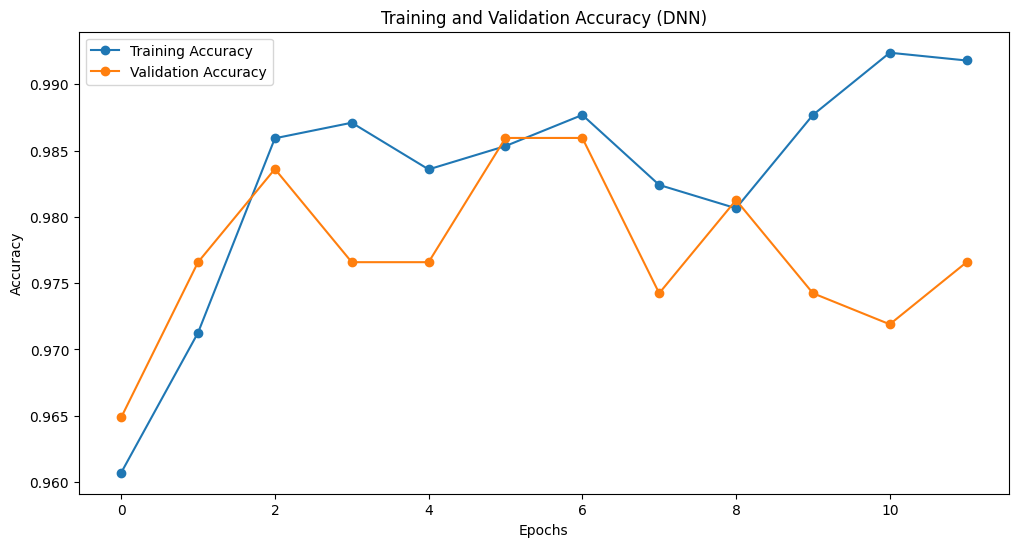

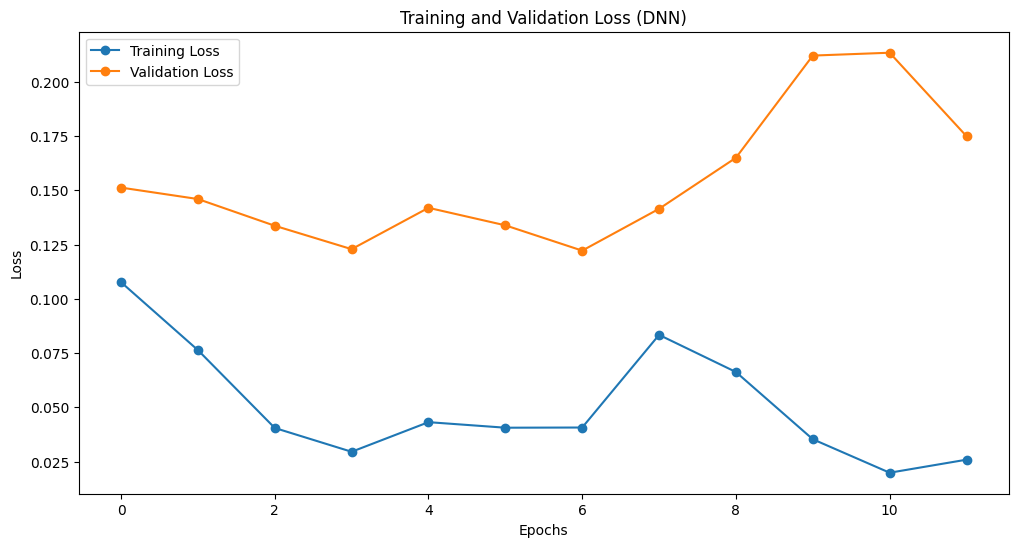

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy (DNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss (DNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


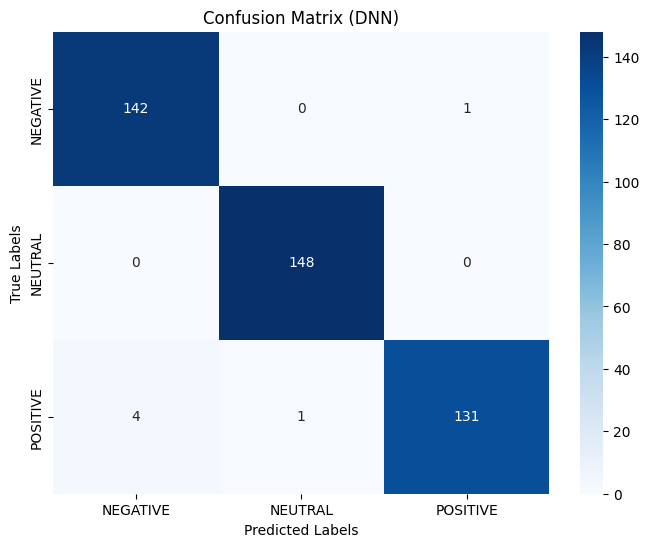

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix (DNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


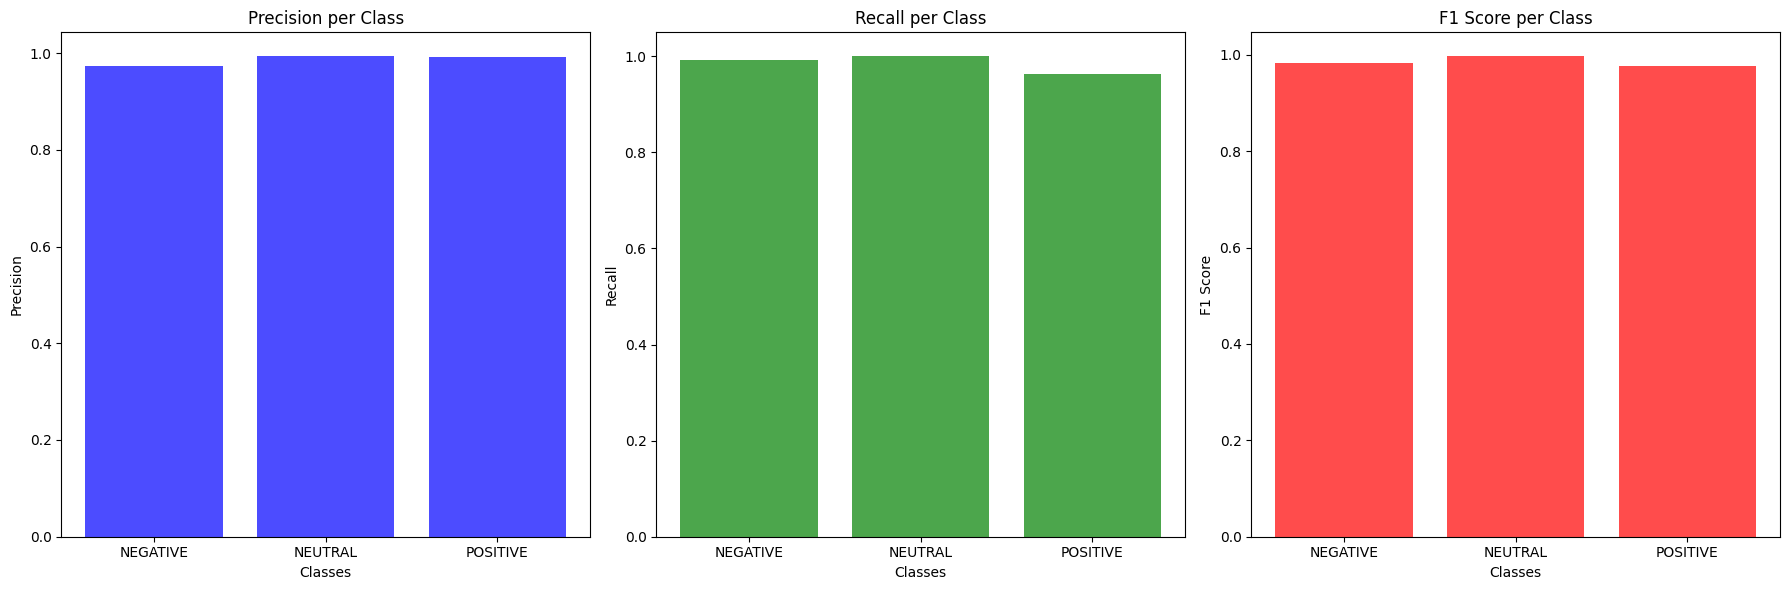

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate Precision, Recall, and F1-Score for each class
precision = precision_score(y_test, y_pred_classes, average=None)  # precision for each class
recall = recall_score(y_test, y_pred_classes, average=None)  # recall for each class
f1 = f1_score(y_test, y_pred_classes, average=None)  # F1 score for each class

# Define class labels
labels = list(label_mapping.keys())

# Plot Precision, Recall, and F1 Score for each class
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision
axes[0].bar(labels, precision, color='blue', alpha=0.7)
axes[0].set_title('Precision per Class')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Precision')

# Plot Recall
axes[1].bar(labels, recall, color='green', alpha=0.7)
axes[1].set_title('Recall per Class')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Recall')

# Plot F1 Score
axes[2].bar(labels, f1, color='red', alpha=0.7)
axes[2].set_title('F1 Score per Class')
axes[2].set_xlabel('Classes')
axes[2].set_ylabel('F1 Score')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
import pickle
with open('/content/drive/My Drive/variable.pkl', 'wb') as f:
    pickle.dump(my_variable, f)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/variable.pkl'

GRU

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
df = pd.read_csv('/content/emotions.csv')  # Update the file path

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
label_mapping = {label: idx for idx, label in enumerate(le.classes_)}

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for GRU input (3D input: samples, time steps, features)
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

In [ ]:
# Define the GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(len(label_mapping), activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred_prob = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.4611 - loss: 1.0485 - val_accuracy: 0.7126 - val_loss: 0.6510
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.7242 - loss: 0.6631 - val_accuracy: 0.8475 - val_loss: 0.4527
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 211s 4s/step - accuracy: 0.8250 - loss: 0.4955 - val_accuracy: 0.8475 - val_loss: 0.4477
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.8369 - loss: 0.4572 - val_accuracy: 0.8592 - val_loss: 0.4241
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.8535 - loss: 0.4186 - val_accuracy: 0.8563 - val_loss: 0.3882
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.8380 - loss: 0.4550 - val_accuracy: 0.8651 - val_loss: 0.3706
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.7214 - loss: 0.7005 - val_accuracy: 0.8328 - val_loss: 0.4477
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.8345 - loss: 0.4341 - val_accuracy: 0.8798 - v

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

Accuracy: 88.76%
Precision: 89.85%
Recall: 88.76%
F1 Score: 88.47%

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.80      0.99      0.88       143
     NEUTRAL       0.97      0.96      0.96       148
    POSITIVE       0.93      0.71      0.80       136

    accuracy                           0.89       427
   macro avg       0.90      0.88      0.88       427
weighted avg       0.90      0.89      0.88       427



In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix for GRU")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on the test set
y_pred_prob = model.predict(X_test_reshaped)  # Use your GRU model's predictions
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Calculate Precision, Recall, and F1-Score for each class
precision = precision_score(y_test, y_pred_classes, average=None)  # Precision for each class
recall = recall_score(y_test, y_pred_classes, average=None)  # Recall for each class
f1 = f1_score(y_test, y_pred_classes, average=None)  # F1 score for each class

# Define class labels
labels = list(label_mapping.keys())  # Ensure you have label_mapping defined as {label: idx} earlier

# Plot Precision, Recall, and F1 Score for each class
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision
axes[0].bar(labels, precision, color='blue', alpha=0.7)
axes[0].set_title('Precision per Class')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Precision')
axes[0].set_ylim(0, 1)

# Plot Recall
axes[1].bar(labels, recall, color='green', alpha=0.7)
axes[1].set_title('Recall per Class')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Recall')
axes[1].set_ylim(0, 1)

# Plot F1 Score
axes[2].bar(labels, f1, color='red', alpha=0.7)
axes[2].set_title('F1 Score per Class')
axes[2].set_xlabel('Classes')
axes[2].set_ylabel('F1 Score')
axes[2].set_ylim(0, 1)

# Display the plots
plt.tight_layout()
plt.show()


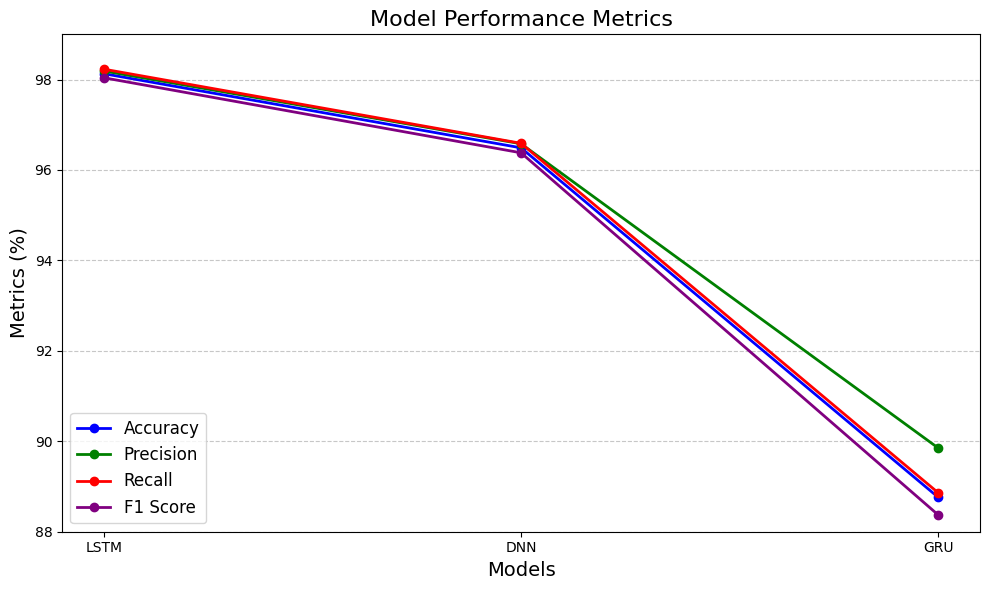

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data with slight offsets for better visualization
models = ['LSTM', 'DNN', 'GRU']
accuracy = [98.13, 96.49, 88.76]
precision = [98.19, 96.58, 89.85]
recall = [98.13 + 0.1, 96.49 + 0.1, 88.76 + 0.1]  # Offset added to recall
f1_score = [98.14 - 0.1, 96.48 - 0.1, 88.47 - 0.1]  # Offset added to F1 score

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each metric
plt.plot(models, accuracy, marker='o', label='Accuracy', color='blue', linewidth=2)
plt.plot(models, precision, marker='o', label='Precision', color='green', linewidth=2)
plt.plot(models, recall, marker='o', label='Recall', color='red', linewidth=2)
plt.plot(models, f1_score, marker='o', label='F1 Score', color='purple', linewidth=2)

# Set labels and title
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Metrics (%)', fontsize=14)

# Set y-axis range
plt.ylim(88, 99)

# Add legend
plt.legend(loc='lower left', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
